In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

from queue import Queue

In [2]:
a = np.array([
  [1, 0, 0, 0, 1],
  [1, 0, 1, 0, 0],
  [0, 1, 1, 1, 1],
  [1, 1, 0, 1, 1],
  [1, 1, 1, 1, 1]
])

In [3]:
def hk(matrix, initialLabel):
    
    # Cria uma matriz auxiliar para armazenar os rótulos temporários
    # Inicializa uma matriz de zeros para armazenar os rótulos temporários
    # e atribui o rótulo inicial. Inicialmente pensado para atender a estratégia
    # de rotulagem da imagem (e), utilizando um threshold para segmentar a região 
    # de interesse e alterando o rótulo inicial de modo a não conflitar com as
    # regiões rotuladas previamente.

    labels = np.zeros_like(matrix)
    label = initialLabel

    # Criação da lista de vizinhos conforme o exercício (8-vizinhos)
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]


    # Percorre a matriz, linha por linha.
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            
            # Ignora elementos com valor zero.
            if matrix[i, j] == 0:
                continue

            # Verifica se existe um rótulo atribuido para aquele ponto
            if labels[i, j] != 0:
                continue

            # Inicializa a queue e adiciona o ponto de interesse na fila, atribuindo 
            # o rótulo inicial determinado anteriormente.

            q = Queue()
            q.put((i, j))
            labels[i, j] = label

            while not q.empty():
                r, c = q.get()

                # Percorre os vizinhos do elemento atual.
                for dr, dc in neighbors:
                    nr, nc = r + dr, c + dc

                    # Verifica se o vizinho está dentro dos limites da matriz.
                    if nr < 0 or nc < 0 or nr >= matrix.shape[0] or nc >= matrix.shape[1]:
                        continue

                    # Verifica se o vizinho já foi rotulado ou não pertence à região conectada atual.
                    if labels[nr, nc] != 0 or matrix[nr, nc] == 0:
                        continue

                    # Rotula o vizinho e adiciona na fila para ser processado posteriormente.
                    labels[nr, nc] = label
                    q.put((nr, nc))

            # Incrementa o rótulo para a próxima região conectada.
            label += 1

    return labels

In [4]:
hk(a, 1)

array([[1, 0, 0, 0, 2],
       [1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1]])

In [5]:
labels = hk(a, 1)

In [6]:
clusters, elements = np.unique(labels, return_counts=True)

# Ignora o rótulo 0 (background)
clusters, elements = clusters[1:], elements[1:] 
print(f"Clusters encontrados: {len(clusters)}")

for cluster, element in zip(clusters, elements):
    print(f"Cluster {cluster}. Caminhos conexos {element}")

Clusters encontrados: 2
Cluster 1. Caminhos conexos 16
Cluster 2. Caminhos conexos 1


In [7]:
color = 1

array1 = np.zeros((256,256))
array2 = np.zeros((256,256))
array3 = np.zeros((256,256))
array4 = np.zeros((256,256))
array5 = np.zeros((256,256))
array6 = np.zeros((256,256))
array7 = np.zeros((256,256))
array8 = np.zeros((256,256))
array9 = np.zeros((256,256))
array10 = np.zeros((256,256))
array11 = np.zeros((256,256))
array12 = np.zeros((256,256))
array13 = np.zeros((256,256))
array14 = np.zeros((256,256))
array15 = np.zeros((256,256))
array16 = np.zeros((256,256))


for x in range(64):
    for y in range(64):
        array1[x][y] = 1
color += 8
for x in range(64):
    for y in range(64):
        array2[x+64][y] = 1
color += 8
for x in range(64):
    for y in range(64):
        array3[x+128][y] = 1
color += 8
for x in range(64):
    for y in range(64):
        array4[x+192][y] = 1
# linha 2
color += 8
for x in range(64):
    for y in range(64):
        array5[x][y+64] = 1
color += 8
for x in range(64):
    for y in range(64):
        array6[x+64][y+64] = 1
color += 8
for x in range(64):
    for y in range(64):
        array7[x+128][y+64] = 1
color += 8
for x in range(64):
    for y in range(64):
        array8[x+192][y+64] = 1
# linha 3
color += 8
for x in range(64):
    for y in range(64):
        array9[x][y+128] = 1
color += 8
for x in range(64):
    for y in range(64):
        array10[x+64][y+128] = 1
color += 8
for x in range(64):
    for y in range(64):
        array11[x+128][y+128] = 1
color += 8
for x in range(64):
    for y in range(64):
        array12[x+192][y+128] = 1
# linha 4
color += 8
for x in range(64):
    for y in range(64):
        array13[x][y+192] = 1
color += 8
for x in range(64):
    for y in range(64):
        array14[x+64][y+192] = 1
color += 8
for x in range(64):
    for y in range(64):
        array15[x+128][y+192] = 1
color += 8
for x in range(64):
    for y in range(64):
        array16[x+192][y+192] = 1

In [8]:
n = np.stack((array1, array2, array3, array4, array5,
              array6, array7, array8, array9, array10,
              array11, array12, array13, array14, array15,
              array16), axis=2)

In [9]:
n.shape

(256, 256, 16)

In [10]:
allLabels = np.zeros((256, 256))

for i in range(16):
  
  labels = hk(n[:, :, i], i+1)
  allLabels = labels + allLabels

In [11]:
clusters, elements = np.unique(allLabels, return_counts=True)

# Ignora o rótulo 0 (background)
clusters, elements = clusters, elements 
print(f"Clusters encontrados: {len(clusters)}")

for cluster, element in zip(clusters, elements):
    print(f"Cluster {cluster}. Caminhos conexos {element}")

Clusters encontrados: 16
Cluster 1.0. Caminhos conexos 4096
Cluster 2.0. Caminhos conexos 4096
Cluster 3.0. Caminhos conexos 4096
Cluster 4.0. Caminhos conexos 4096
Cluster 5.0. Caminhos conexos 4096
Cluster 6.0. Caminhos conexos 4096
Cluster 7.0. Caminhos conexos 4096
Cluster 8.0. Caminhos conexos 4096
Cluster 9.0. Caminhos conexos 4096
Cluster 10.0. Caminhos conexos 4096
Cluster 11.0. Caminhos conexos 4096
Cluster 12.0. Caminhos conexos 4096
Cluster 13.0. Caminhos conexos 4096
Cluster 14.0. Caminhos conexos 4096
Cluster 15.0. Caminhos conexos 4096
Cluster 16.0. Caminhos conexos 4096


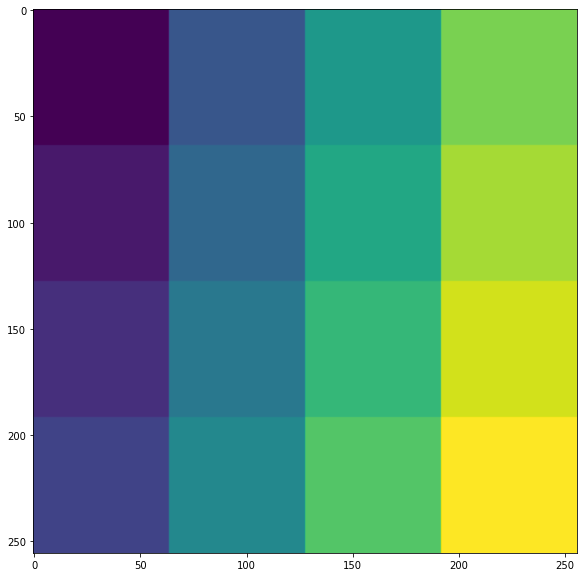

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(allLabels)
plt.show()